In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_excel('netflix_titles.xlsx')
df.head()

C:\Users\Aarzoo Maurya\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,show_id,type,title,director,director (Cleaned),cast,cast(cleaned),country,country(cleaned),date_added,release_year,rating,rating(cleaned),duration,duration(cleaned),listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Kirsten Johnson,NaN,Unknown,United States,United States,2021-09-25 00:00:00,2020,PG-13,PG-13,90 min,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,South Africa,2021-09-24 00:00:00,2021,TV-MA,TV-MA,2 Seasons,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,Unknown,2021-09-24 00:00:00,2021,TV-MA,TV-MA,1 Season,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,Unknown,NaN,Unknown,NaN,Unknown,2021-09-24 00:00:00,2021,TV-MA,TV-MA,1 Season,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,India,2021-09-24 00:00:00,2021,TV-MA,TV-MA,2 Seasons,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.isnull().sum()


show_id                  0
type                     0
title                    0
director              2634
director (Cleaned)       0
cast                   825
cast(cleaned)            0
country                831
country(cleaned)         0
date_added              10
release_year             0
rating                   4
rating(cleaned)          0
duration                 3
duration(cleaned)        0
listed_in                0
description              0
dtype: int64

🔹 Type Distribution

<Axes: xlabel='type', ylabel='count'>

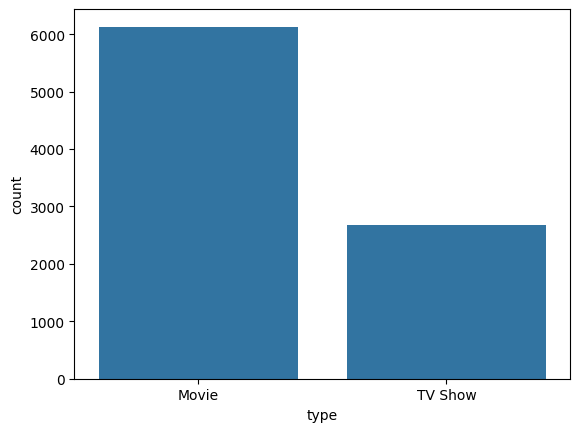

In [7]:
sns.countplot(data=df, x='type')


🔹 Content Added Over Years

<Axes: xlabel='release_year'>

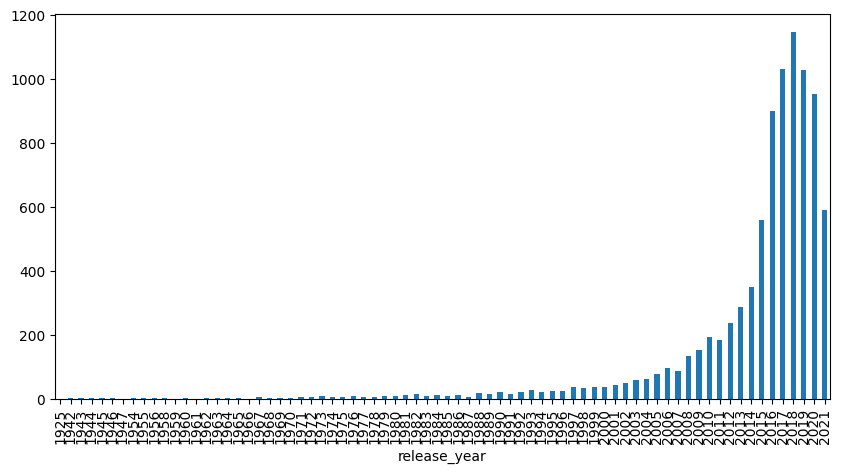

In [29]:
df['release_year'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))


🔹 Top 10 Countries Producing Content

<Axes: ylabel='country'>

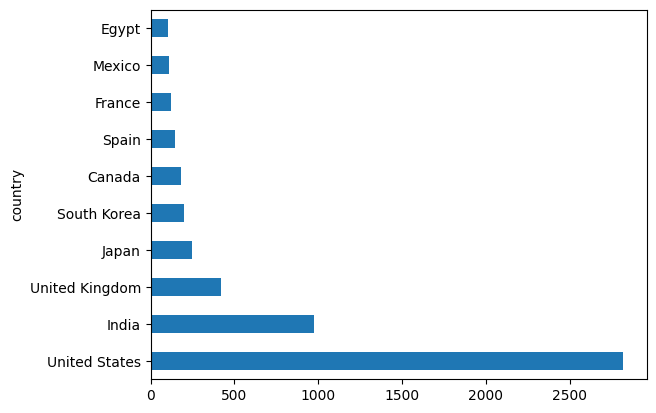

In [37]:
df['country'].value_counts().head(10).plot(kind='barh')


🔹 Most Common Genres

<Axes: xlabel='Count', ylabel='Genre'>

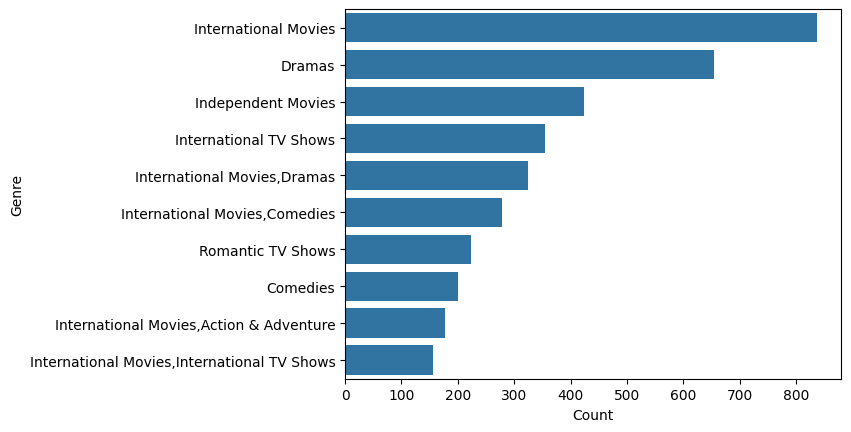

In [31]:
from collections import Counter

genres = ','.join(df['listed_in'].dropna()).split(', ')
top_genres = Counter(genres).most_common(10)

# Convert to DataFrame
genres_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])
sns.barplot(data=genres_df, x='Count', y='Genre')


🔹 Ratings Distribution

<Axes: xlabel='count', ylabel='rating'>

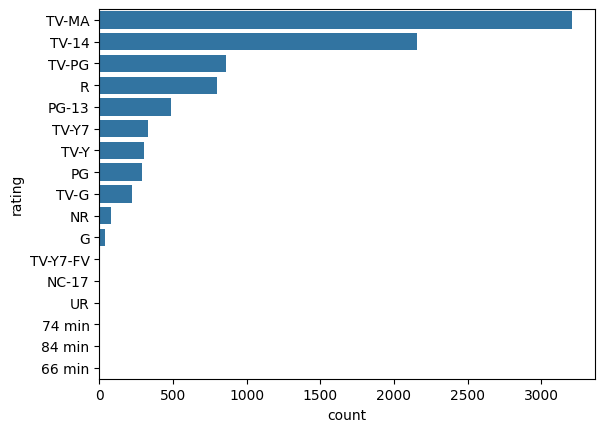

In [32]:
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index)


(np.float64(-0.5), np.float64(999.5), np.float64(499.5), np.float64(-0.5))

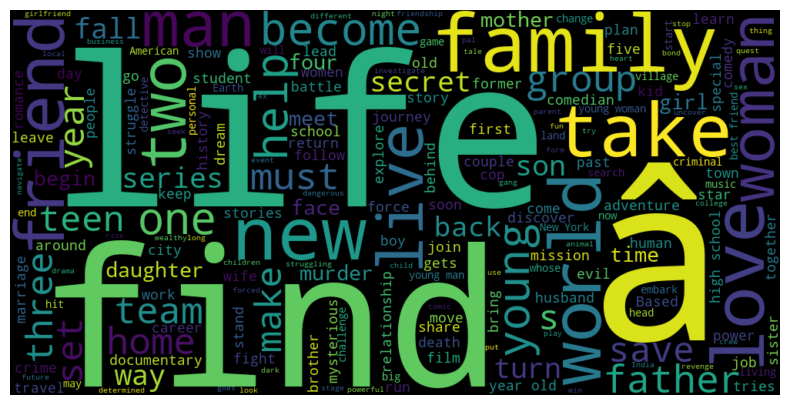

In [33]:
from wordcloud import WordCloud

text = ' '.join(df['description'].dropna())
wordcloud = WordCloud(width=1000, height=500, background_color='black').generate(text)

plt.figure(figsize=(15,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
